In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [62]:
data_up = pd.read_csv('../data/all_risk_processed.csv', index_col=0)

In [63]:
data_up.head()

,record_id,risk_1_timestamp,age,sex,height,weight,zipcode,ethnicity,income,education,...,province_code,latitude,longitude,fips,GISJOIN,FIPS,ADI_NATRANK,ADI_STATERNK,spinal_risk_score,old_spinal_risk_score
0,3,1/26/2024 22:04,25,1,18,36,76177,4,4,6,...,439.0,32.9448,-97.3124,4.843911e+11,G48043901139401,4.843911e+11,34,2,0.843445,0.850389
1,6,1/26/2024 22:04,28,1,25,77,32226,4,13,6,...,31.0,30.4735,-81.5448,1.203101e+11,G12003100101071,1.203101e+11,55,6,0.725933,0.740909
2,22,1/26/2024 22:04,20,2,16,25,28729,4,11,6,...,89.0,35.3172,-82.5977,3.708993e+11,G37008909307033,3.708993e+11,47,3,0.512651,0.426640
3,4,1/26/2024 22:04,31,1,23,131,94041,5,6,7,...,85.0,37.3893,-122.0783,6.085510e+10,G06008505096003,6.085510e+10,1,1,0.598028,0.511215
4,21,1/26/2024 22:04,25,1,26,106,50010,2,4,7,...,169.0,42.0379,-93.6003,1.916900e+11,G19016900001011,1.916900e+11,30,1,0.881841,0.830583


<Axes: xlabel='dospert_health/safety', ylabel='spinal_risk_score'>

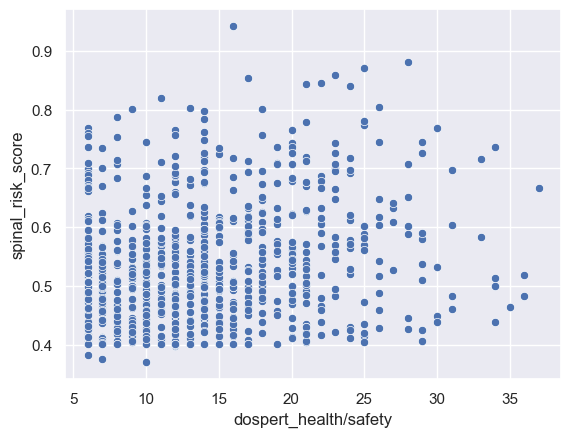

In [79]:
sns.scatterplot(x=data_up['dospert_health/safety'], y=data_up.spinal_risk_score)

In [3]:
data = pd.read_csv("../data/ml_data_processed_final.csv")
data

,ohe__religion_10,cat__sex,cat__income,cat__education,cat__prior_surg,cat__succ_surg,num__age,num__odi_final,num__bmi,num__dospert_ethical,num__dospert_financial,num__dospert_health/safety,num__dospert_recreational,num__dospert_social,num__height_m,num__weight_kg,num__ADI_NATRANK,num__ADI_STATERNK,spinal_risk_score
0,0.0,1.0,4.0,6.0,1.0,1.0,-1.451225,-0.841732,-0.995194,0.634665,1.035893,1.066906,2.797536,1.174613,-0.551831,-1.100657,-0.450926,-1.118717,0.843445
1,0.0,1.0,13.0,6.0,1.0,1.0,-1.298420,-0.705424,-0.731667,1.253831,0.375335,1.372995,1.560247,1.480169,1.178208,-0.223692,0.320327,0.337068,0.725933
2,1.0,2.0,11.0,6.0,1.0,1.0,-1.705898,-0.978040,-1.087988,-0.397279,-1.441197,-1.075717,-1.051807,-0.811502,-1.046128,-1.335940,0.026517,-0.754771,0.512651
3,0.0,1.0,6.0,7.0,1.0,1.0,-1.145616,-0.296500,0.634121,-0.603668,-0.780640,0.148639,0.048005,-0.658724,0.683911,0.931335,-1.662897,-1.482664,0.598028
4,1.0,1.0,4.0,7.0,1.0,1.0,-1.451225,-0.841732,-0.245044,0.015499,-1.441197,2.138217,0.460435,0.257944,1.425357,0.396601,-0.597832,-1.482664,0.881841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,0.0,1.0,1.0,6.0,1.0,1.0,-1.705898,-0.978040,-0.547173,-0.397279,-0.450361,-0.310494,-0.364425,-0.505946,1.178208,-0.031187,0.357054,0.337068,0.466276
795,0.0,2.0,1.0,6.0,0.0,0.0,-1.298420,-0.569116,0.176618,1.460220,0.705614,1.832128,0.460435,0.716279,-0.304682,0.011591,0.283601,0.701014,0.603798
796,0.0,1.0,4.0,5.0,0.0,0.0,-0.483465,-0.296500,-0.344790,-0.397279,-1.441197,0.913861,-0.501901,-0.964280,1.425357,0.289654,1.752656,1.792854,0.445468
797,1.0,2.0,12.0,8.0,1.0,1.0,0.738968,-0.569116,0.371300,-1.016445,1.035893,-1.228761,-0.364425,1.174613,-0.304682,0.182707,-1.552717,-1.118717,0.709183


In [31]:

X = data.drop(['spinal_risk_score'], axis=1)  # All columns except the last one are predictors
y = data['spinal_risk_score'].to_numpy()   # The last column is the response variable


# Dropping additional columns
X = X.drop(['num__height_m', 'num__ADI_STATERNK'], axis=1)

In [33]:
X

,ohe__religion_10,cat__sex,cat__income,cat__education,cat__prior_surg,cat__succ_surg,num__age,num__odi_final,num__bmi,num__dospert_ethical,num__dospert_financial,num__dospert_health/safety,num__dospert_recreational,num__dospert_social,num__weight_kg,num__ADI_NATRANK
0,0.0,1.0,4.0,6.0,1.0,1.0,-1.451225,-0.841732,-0.995194,0.634665,1.035893,1.066906,2.797536,1.174613,-1.100657,-0.450926
1,0.0,1.0,13.0,6.0,1.0,1.0,-1.298420,-0.705424,-0.731667,1.253831,0.375335,1.372995,1.560247,1.480169,-0.223692,0.320327
2,1.0,2.0,11.0,6.0,1.0,1.0,-1.705898,-0.978040,-1.087988,-0.397279,-1.441197,-1.075717,-1.051807,-0.811502,-1.335940,0.026517
3,0.0,1.0,6.0,7.0,1.0,1.0,-1.145616,-0.296500,0.634121,-0.603668,-0.780640,0.148639,0.048005,-0.658724,0.931335,-1.662897
4,1.0,1.0,4.0,7.0,1.0,1.0,-1.451225,-0.841732,-0.245044,0.015499,-1.441197,2.138217,0.460435,0.257944,0.396601,-0.597832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,0.0,1.0,1.0,6.0,1.0,1.0,-1.705898,-0.978040,-0.547173,-0.397279,-0.450361,-0.310494,-0.364425,-0.505946,-0.031187,0.357054
795,0.0,2.0,1.0,6.0,0.0,0.0,-1.298420,-0.569116,0.176618,1.460220,0.705614,1.832128,0.460435,0.716279,0.011591,0.283601
796,0.0,1.0,4.0,5.0,0.0,0.0,-0.483465,-0.296500,-0.344790,-0.397279,-1.441197,0.913861,-0.501901,-0.964280,0.289654,1.752656
797,1.0,2.0,12.0,8.0,1.0,1.0,0.738968,-0.569116,0.371300,-1.016445,1.035893,-1.228761,-0.364425,1.174613,0.182707,-1.552717


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

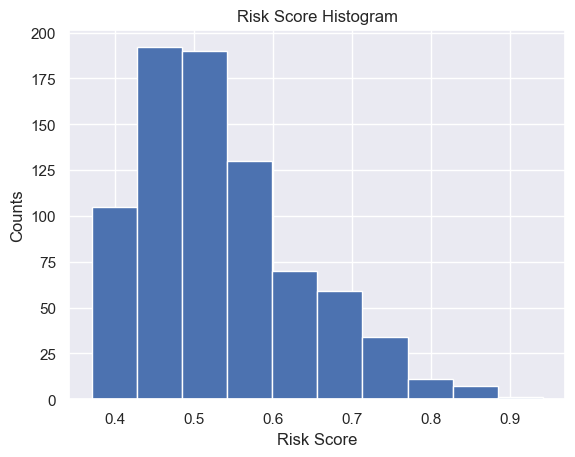

In [35]:
plt.hist(y)
plt.xlabel('Risk Score')
plt.ylabel('Counts')
plt.title('Risk Score Histogram')
plt.show()

In [36]:
X_train

,ohe__religion_10,cat__sex,cat__income,cat__education,cat__prior_surg,cat__succ_surg,num__age,num__odi_final,num__bmi,num__dospert_ethical,num__dospert_financial,num__dospert_health/safety,num__dospert_recreational,num__dospert_social,num__weight_kg,num__ADI_NATRANK
264,1.0,1.0,5.0,6.0,0.0,0.0,0.331490,-0.296500,-0.198685,1.253831,0.540475,1.372995,0.185482,-0.200390,0.332432,0.761044
615,0.0,2.0,6.0,4.0,1.0,1.0,1.553923,-0.432808,-1.408030,-0.603668,-1.110919,-0.463539,-0.776854,-0.353168,-1.592613,-0.377474
329,0.0,2.0,11.0,7.0,0.0,0.0,-1.247486,-0.978040,-0.191666,-0.603668,0.210196,-0.004406,-0.639378,0.563501,-0.715648,1.091581
342,0.0,2.0,3.0,4.0,1.0,1.0,0.178686,0.248732,0.829769,1.253831,0.540475,2.291262,-0.226948,1.785725,0.717442,0.136696
394,0.0,1.0,14.0,6.0,0.0,0.0,-0.228792,-0.841732,-0.448127,-0.397279,-0.120083,-0.922672,-0.364425,0.869057,0.396601,-0.414200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.0,1.0,1.0,3.0,0.0,0.0,-1.145616,-0.705424,-0.858503,-0.810056,-0.120083,-1.075717,-0.089472,0.257944,-1.314551,-1.515991
106,0.0,1.0,1.0,3.0,0.0,0.0,-1.349355,-0.432808,3.106391,2.904941,0.045057,1.219950,-0.914331,0.563501,3.990019,-0.304021
270,0.0,2.0,7.0,3.0,1.0,1.0,0.025882,1.339197,1.559084,-1.016445,-0.120083,1.066906,-0.776854,1.327391,0.931335,0.577412
435,1.0,1.0,4.0,6.0,1.0,1.0,0.076816,0.521349,-0.449402,1.872997,-0.945779,2.903439,1.010341,1.938503,-0.138134,-0.671285


In [54]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
import shap

# Define models
models = {
    # 'Linear Regression': LinearRegression(),
    # 'Random Forest Regression': RandomForestRegressor(),
    'XGBoost Regression': XGBRegressor(),
    # 'Decision Tree Regression': DecisionTreeRegressor(),
    'Gradient Boosting Regression': GradientBoostingRegressor(),
    'SVM Regression': SVR()
}

# Define parameter grids for hyperparameter tuning
param_grids = {
    'Random Forest Regression': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'XGBoost Regression': {
        'n_estimators': [100, 200, 300, 400],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 5, 7, 9]
    },
    'Gradient Boosting Regression': {
        'n_estimators': [100, 200, 300, 400],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 5, 7, 9]
    },
    'SVM Regression': {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto'],
        'kernel': ['linear', 'rbf']
    }
}

# Perform hyperparameter tuning and model training
predictions = {}
best_models = {}
for model_name, model in models.items():
    if model_name in param_grids:
        # Perform hyperparameter tuning
        grid_search = GridSearchCV(model, param_grids[model_name], cv=3, scoring='neg_mean_squared_error')
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('grid_search', grid_search)
        ])
    else:
        # No hyperparameter tuning for models without param grids
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('model', model)
        ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f'{model_name} - Mean Squared Error: {mse}')
    predictions[model_name] = y_pred
    best_models[model_name] = pipeline

    # if model_name == 'Random Forest Regression':
    #     # Fit SHAP explainer for Random Forest
    #     explainer = shap.TreeExplainer(pipeline.named_steps['model'])
    #     shap_values = explainer.shap_values(X_train)
    #     shap.summary_plot(shap_values, X_train, plot_type='bar', feature_names=X_train.columns)


XGBoost Regression - Mean Squared Error: 0.00921188895385933
Gradient Boosting Regression - Mean Squared Error: 0.009151674592118067
SVM Regression - Mean Squared Error: 0.009495849490056807


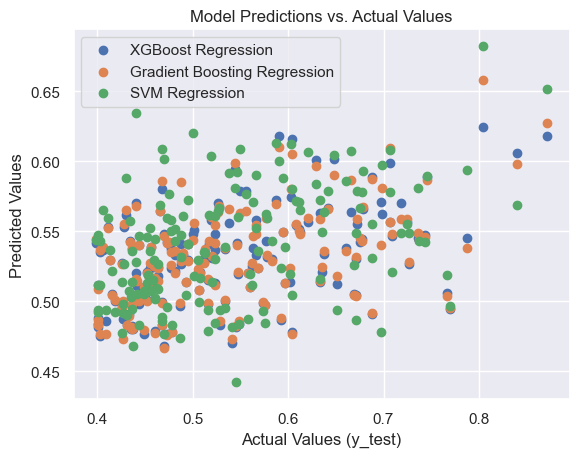

In [55]:
for model_name, y_pred in predictions.items():
    plt.scatter(y_test, y_pred, label=model_name)

plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values')
plt.title('Model Predictions vs. Actual Values')
plt.legend()
plt.grid(True)
plt.show()

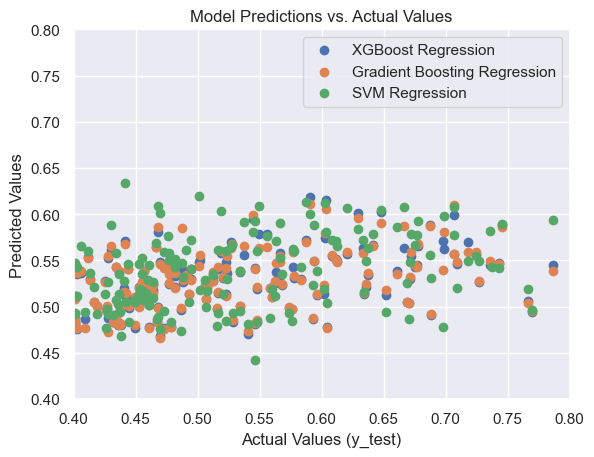

In [56]:
for model_name, y_pred in predictions.items():
    if model_name in ['XGBoost Regression', 'Gradient Boosting Regression', 'SVM Regression']:
        plt.scatter(y_test, y_pred, label=model_name)

plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values')
plt.title('Model Predictions vs. Actual Values')
plt.legend()
plt.grid(True)
plt.xlim([0.4, 0.8])
plt.ylim([0.4, 0.8])
plt.show()

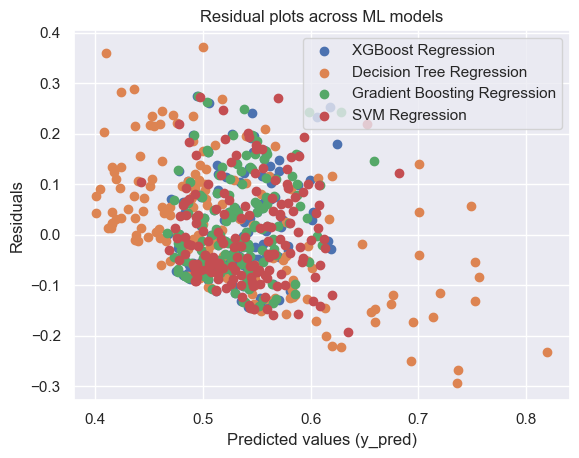

In [52]:
for model_name, y_pred in predictions.items():
    if model_name not in []:
        plt.scatter(y_pred, y_test - y_pred, label=model_name)

plt.xlabel('Predicted values (y_pred)')
plt.ylabel('Residuals')
plt.title('Residual plots across ML models')
plt.legend()
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


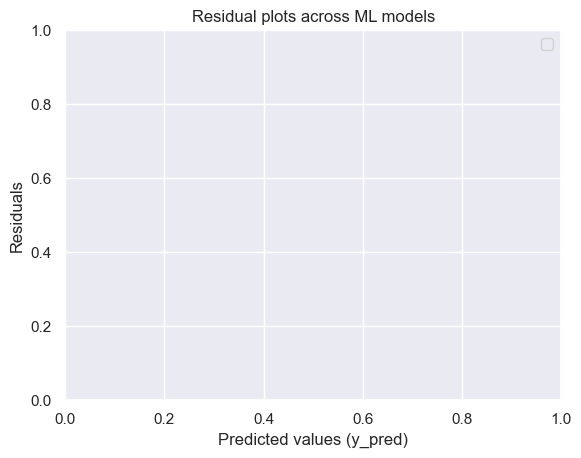

In [53]:
for model_name, y_pred in predictions.items():
    if model_name in ['Linear Regression', 'Random Forest Regression']:
        plt.scatter(y_pred, y_test - y_pred, label=model_name)

plt.xlabel('Predicted values (y_pred)')
plt.ylabel('Residuals')
plt.title('Residual plots across ML models')
plt.legend()
plt.grid(True)
plt.show()

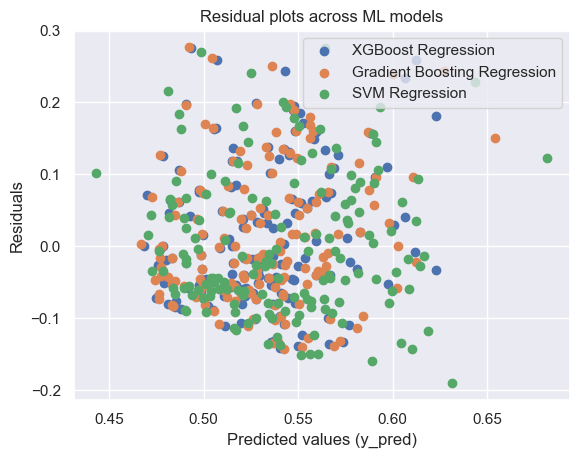

In [13]:
for model_name, y_pred in predictions.items():
    if model_name in ['XGBoost Regression', 'Gradient Boosting Regression', 'SVM Regression']:
        plt.scatter(y_pred, y_test - y_pred, label=model_name)

plt.xlabel('Predicted values (y_pred)')
plt.ylabel('Residuals')
plt.title('Residual plots across ML models')
plt.legend()
plt.grid(True)
plt.show()

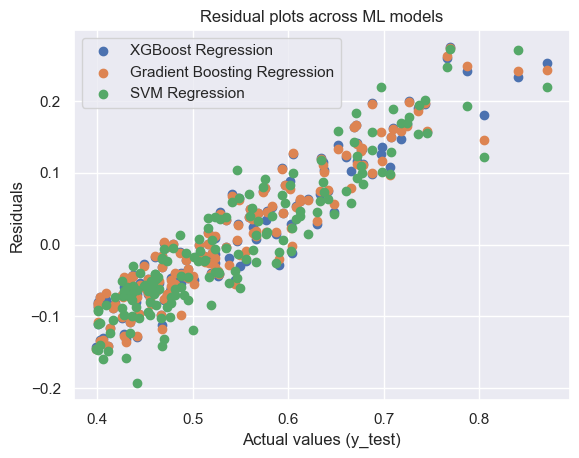

In [41]:
for model_name, y_pred in predictions.items():
    if model_name in ['XGBoost Regression', 'Gradient Boosting Regression', 'SVM Regression']:
        plt.scatter(y_test, y_test - y_pred, label=model_name)

plt.xlabel('Actual values (y_test)')
plt.ylabel('Residuals')
plt.title('Residual plots across ML models')
plt.legend()
plt.grid(True)
plt.show()

In [42]:
best_models['Linear Regression'].get_params

<bound method Pipeline.get_params of Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])>

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curves(model, X, y):
    train_sizes, train_scores, valid_scores = learning_curve(
        model, X, y, train_sizes=np.linspace(0.1, 1.0, 10),
        scoring='neg_mean_squared_error', cv=5)
    
    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    valid_scores_mean = -np.mean(valid_scores, axis=1)
    valid_scores_std = np.std(valid_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='Training error', color='blue')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color='blue')
    plt.plot(train_sizes, valid_scores_mean, label='Validation error', color='orange')
    plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std,
                     valid_scores_mean + valid_scores_std, alpha=0.1, color='orange')
    
    plt.xlabel('Training examples')
    plt.ylabel('Mean Squared Error')
    plt.title('Learning Curves')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()


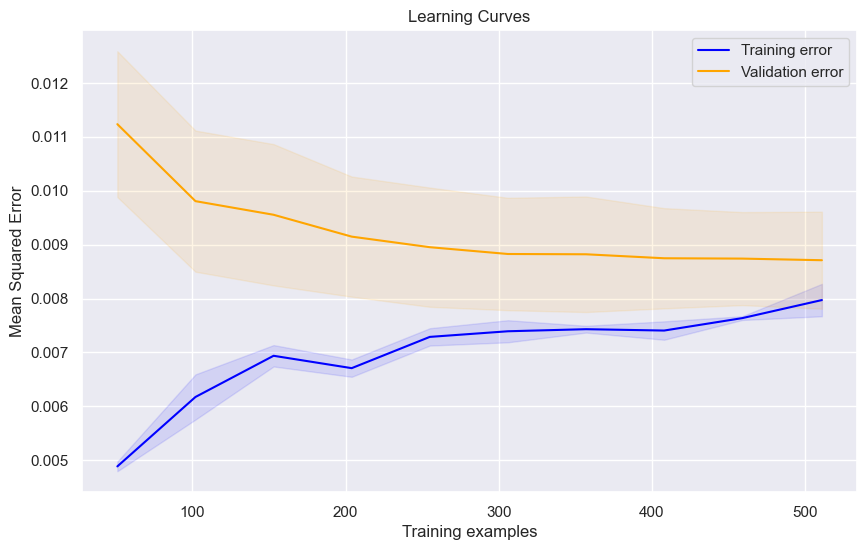

In [44]:
# Assuming you have your X_train and y_train ready
# Let's visualize learning curves for one of your models, for example, RandomForestRegressor
model = LinearRegression()
plot_learning_curves(model, X_train, y_train)

In [45]:
best_models['Random Forest Regression'].named_steps['grid_search'].best_estimator_

RandomForestRegressor(min_samples_split=5, n_estimators=300)

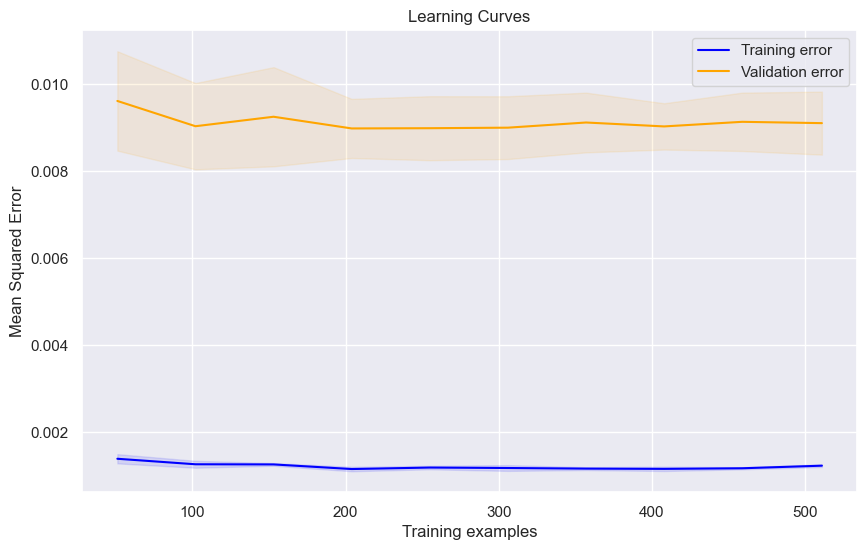

In [46]:
model = RandomForestRegressor(max_depth=20, n_estimators=300)
plot_learning_curves(model, X_train, y_train)

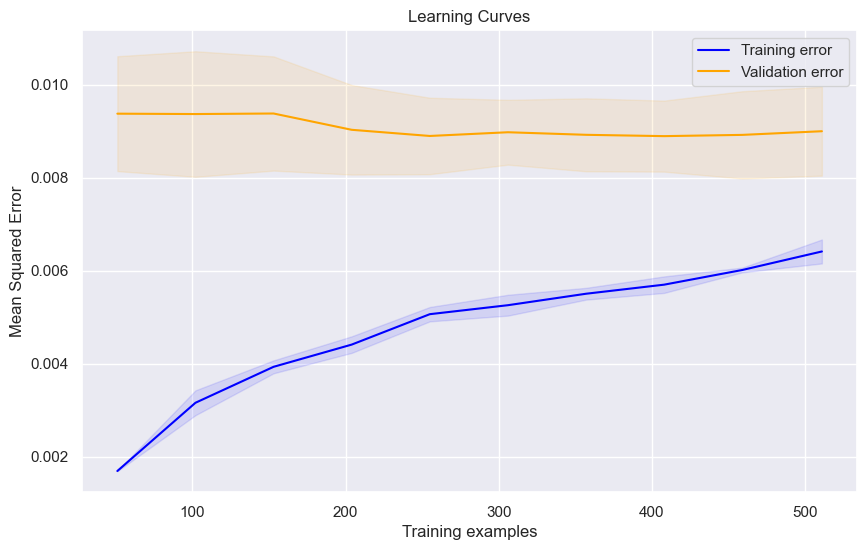

In [47]:
model = XGBRegressor(max_depth=3, learning_rate=0.01, n_estimators=200)
plot_learning_curves(model, X_train, y_train)

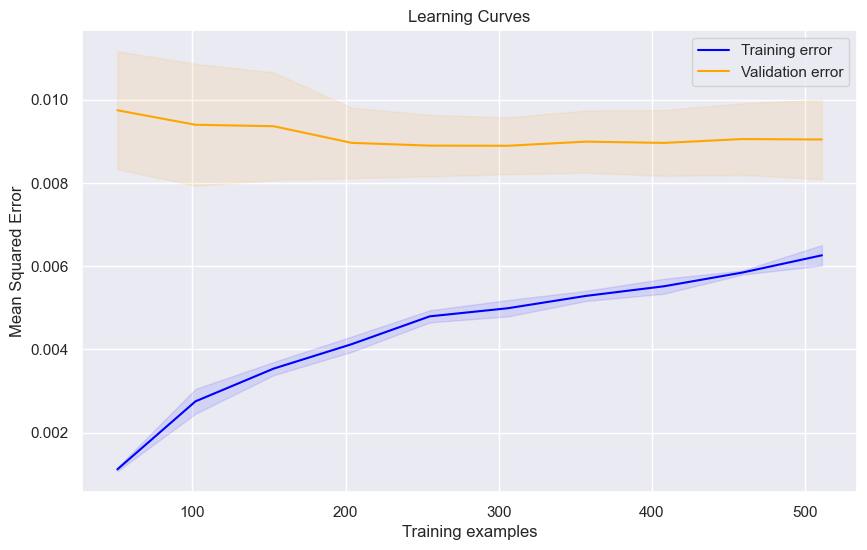

In [48]:
model = GradientBoostingRegressor(learning_rate=0.01, n_estimators=200)
plot_learning_curves(model, X_train, y_train)

In [ ]:
best_models['Gradient Boosting Regression'].named_steps['grid_search'].best_estimator_